<a href="https://colab.research.google.com/github/abdullah1234-bit/NLP-/blob/main/News_classification_using_Gensim_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install gensim

In [5]:
import gensim.downloader as api
# This is a huge model (~1.6 gb) and it will take some time to load

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
wv.similarity(w1="great", w2="good")

0.729151

In [12]:
import pandas as pd


#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("/content/Fake.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(7915, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [10]:
df = pd.read_csv("/content/True.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(6367, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,Trump says he will not negotiate on 20 percent...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,27-Sep-17
2,Exclusive: Republican U.S. tax framework sets ...,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,27-Sep-17
3,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,27-Sep-17
4,U.S. mulls request by lawmakers to waive shipp...,WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,27-Sep-17


In [15]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [16]:
combined_df = pd.concat([df_fake, df_true], ignore_index=True)

In [17]:
print(combined_df.shape)  # Print shape of combined_df
print(df_fake.shape[0] + df_true.shape[0])  # Print sum of rows of df_fake and df_true

(14282, 4)
14282


In [18]:
import pandas as pd

# ... (your previous code for combining the DataFrames) ...
print(combined_df.shape)  # Print shape of combined_df
print(df_fake.shape[0] + df_true.shape[0])  # Print sum of rows of df_fake and df_true

# Add the 'label' column
combined_df['label'] = 0  # Initialize with 0 (representing 'fake')
combined_df.loc[df_fake.shape[0]:, 'label'] = 1  # Set 'label' to 1 (representing 'true') for rows from df_true

# Print the updated DataFrame
print(combined_df.head())

(14282, 4)
14282
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  label  
0  Donald Trump just couldn t wish all Americans ...    News  31-Dec-17      0  
1  House Intelligence Committee Chairman Devin Nu...    News  31-Dec-17      0  
2  On Friday, it was revealed that former Milwauk...    News  30-Dec-17      0  
3  On Christmas day, Donald Trump announced that ...    News  29-Dec-17      0  
4  Pope Francis used his annual Christmas Day mes...    News  25-Dec-17      0  


In [19]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    """Preprocesses the input text using spaCy.

    Args:
        text (str): The input text.

    Returns:
        str: The preprocessed text.
    """

    doc = nlp(text)

    # 1. Lowercasing and tokenization are handled by spaCy
    # 2. Removing punctuation and stop words
    words = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

    # 3. Joining the words back into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing function to the 'text' column
combined_df['preprocessed_text'] = combined_df['text'].apply(preprocess_text_spacy)

# Print the updated DataFrame
print(combined_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News  31-Dec-17   
1  House Intelligence Committee Chairman Devin Nu...    News  31-Dec-17   
2  On Friday, it was revealed that former Milwauk...    News  30-Dec-17   
3  On Christmas day, Donald Trump announced that ...    News  29-Dec-17   
4  Pope Francis used his annual Christmas Day mes...    News  25-Dec-17   

   label                                  preprocessed_text  
0      0  Donald Trump couldn t wish Americans Happy New...  
1      0  House Intelligence Committee Chairman Devin Nu...  
2      0  Friday reveal Mi

In [20]:
import gensim.downloader as api
import numpy as np

# Load the Word2Vec model (if not already loaded)
wv = api.load('word2vec-google-news-300')

def get_mean_vector(text, wv):
    words = text.split()
    vectors = [wv[word] for word in words if word in wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(wv.vector_size)

# Apply the function to the preprocessed text column
combined_df['word2vec embeddings'] = combined_df['preprocessed_text'].apply(lambda text: get_mean_vector(text, wv))

# Convert the embeddings column to a NumPy array
X = np.stack(combined_df['word2vec embeddings'].values)

In [25]:
print(combined_df.columns)

Index(['title', 'text', 'subject', 'date', 'label', 'preprocessed_text',
       'word2vec embeddings'],
      dtype='object')


In [27]:
print(combined_df['word2vec embeddings'][0])

[ 2.07609385e-02  5.31300306e-02 -1.19307181e-02  6.65034428e-02
 -4.13104929e-02 -2.68186387e-02  1.73222795e-02 -4.79474366e-02
  1.06361583e-01  3.90921757e-02 -5.47707118e-02 -4.06176709e-02
 -3.44148427e-02  5.40361069e-02 -6.15793243e-02  3.12533081e-02
  4.80631404e-02  8.02979991e-02 -4.46515670e-03 -8.67816210e-02
  2.80525978e-03  3.48842889e-02  5.87815754e-02 -4.74162586e-02
  5.99735528e-02  1.36946291e-02 -3.57317105e-02  3.42875086e-02
  6.35366142e-02 -4.74745966e-03 -9.52004455e-03 -5.24589792e-03
 -6.92515820e-02 -3.16530317e-02  5.74873351e-02  2.06649955e-02
  8.47104099e-03  1.82580147e-02 -2.57508922e-03  6.27583414e-02
  7.68723115e-02 -6.38901740e-02  1.06726587e-01  2.82810628e-02
 -3.63082513e-02 -7.13530704e-02 -1.64406709e-02  4.20240611e-02
 -2.82215588e-02  5.62124290e-02 -9.13233310e-02  6.46847934e-02
 -1.51450224e-02  1.95990875e-02  5.26964813e-02  4.51546647e-02
 -4.99579348e-02 -7.93773010e-02 -3.81267513e-03 -1.04629762e-01
 -1.39356256e-02  8.86530

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the embeddings to 2D for MinMaxScaler
embeddings_2d = X.reshape(X.shape[0], -1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the embeddings
scaled_embeddings = scaler.fit_transform(embeddings_2d)

# Reshape the scaled embeddings back to the original shape
X_scaled = scaled_embeddings.reshape(X.shape)

# Update the 'embeddings' column in the DataFrame (optional)
combined_df['embeddings'] = list(X_scaled)

In [30]:
print(X_scaled[0])  # Print the first scaled embedding
print(X_scaled[1])  # Print the second scaled embedding
# ... print a few more embeddings

[0.63362014 0.5794783  0.27366546 0.55051637 0.4485842  0.5841068
 0.5387212  0.6101611  0.54344016 0.46584374 0.42800838 0.5000989
 0.44208276 0.56039304 0.56880677 0.3970306  0.6526262  0.65925056
 0.4899462  0.34800622 0.48925436 0.49671754 0.5577518  0.26963645
 0.40634388 0.6165181  0.6954125  0.5679555  0.63823295 0.50558656
 0.49736065 0.6434156  0.5666147  0.51643366 0.7339198  0.71295667
 0.5077413  0.3506711  0.6456053  0.41042656 0.68553376 0.47703588
 0.47443992 0.4622127  0.5892532  0.5423918  0.7410623  0.5779041
 0.557104   0.39427754 0.24023896 0.65826607 0.36967945 0.53393596
 0.8504712  0.5967832  0.7770662  0.27784592 0.5318804  0.49509618
 0.57032347 0.67127347 0.37968186 0.62823236 0.44956103 0.5769463
 0.36066413 0.4710513  0.4009078  0.59529066 0.80791414 0.41393337
 0.45293668 0.54591906 0.613382   0.5048688  0.47542763 0.57940745
 0.6196736  0.7274632  0.47202048 0.48414582 0.55387276 0.4559021
 0.3238673  0.5072385  0.36822954 0.6693053  0.5947556  0.38670695


In [31]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = X_scaled
y = combined_df['label'].values  # Target (labels: 0 for fake, 1 for true)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11425, 300)
X_test shape: (2857, 300)
y_train shape: (11425,)
y_test shape: (2857,)


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the predicted labels
print(y_pred)

[1 1 1 ... 0 0 0]


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9901995099754988
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1592
           1       0.99      0.99      0.99      1265

    accuracy                           0.99      2857
   macro avg       0.99      0.99      0.99      2857
weighted avg       0.99      0.99      0.99      2857

Confusion Matrix:
[[1581   11]
 [  17 1248]]


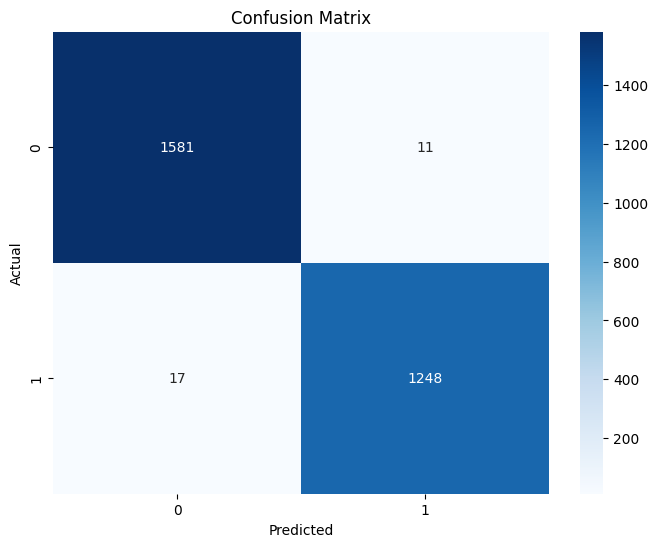

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()